In [3]:
# implement pipelining of old photo restoration
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils.adjust_sharpness import unsharp_masking
from utils.histogrameq_contrast_brightness import equalize_histogram, adjust_brightness_contrast
from utils.mask_inpaint import inpaint_scratches
from utils.util import display_two_images
from utils.noise_reduction import adaptive_noise_reduction

Image shape: (256, 400, 3)
c:\Users\yasir\Desktop\image_project\old_photo_restoration
Mask generation completed successfully.
initializing the dataloader
model weights loaded
directory of testing image: c:\Users\yasir\Desktop\image_project\old_photo_restoration\mask_generation\input
processing image.png

Mask shape: (256, 400)


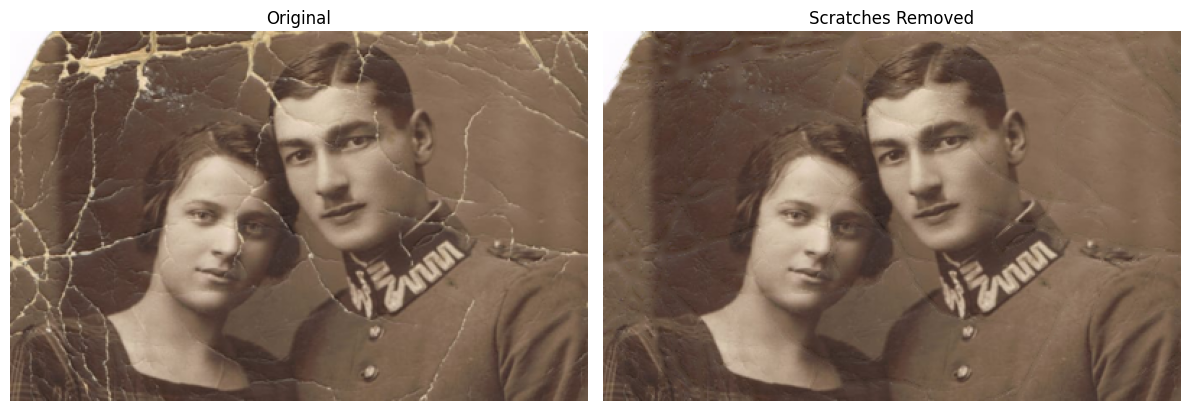

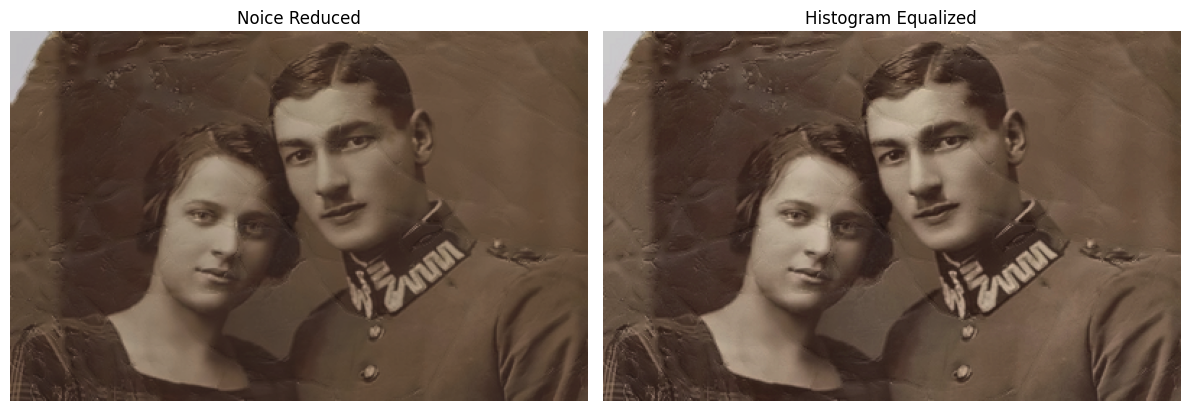

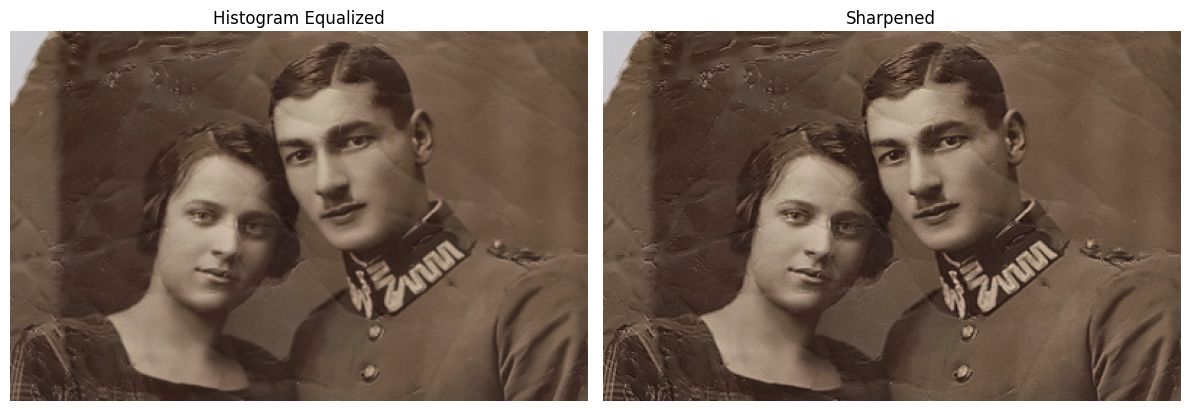

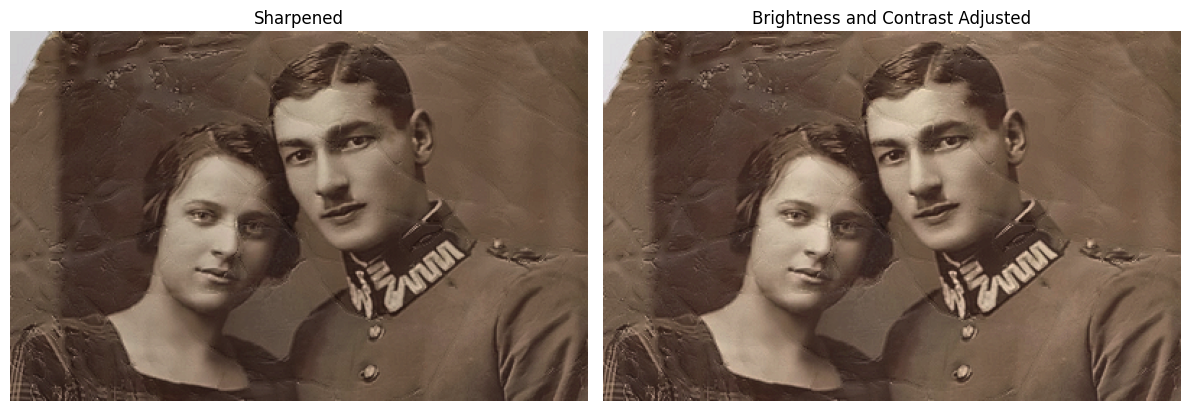

In [4]:
org_image = cv2.imread('image.png')
org_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)

# Step 1: Remove scratches
scratches_removed = inpaint_scratches(org_image)
display_two_images(org_image, scratches_removed, 'Original', 'Scratches Removed')

# Step 2: Noise reduction
# noise_reduced = noise_reduction(scratches_removed)
noise_reduced = adaptive_noise_reduction(scratches_removed)
display_two_images(scratches_removed, noise_reduced, 'Scratches Removed', 'Noise Reduced')

noise_reduced = adaptive_portrait_enhancement(noise_reduced)
display_two_images(scratches_removed, noise_reduced, 'Noise Reduced', 'Portrait Enhanced')

# Step 3: Adjust brightness and contrast
hist_eq = equalize_histogram(noise_reduced)
display_two_images(noise_reduced, hist_eq, 'Noice Reduced', 'Histogram Equalized')

# Step 4: Adjust sharpness
sharpened = unsharp_masking(hist_eq)
display_two_images(hist_eq, sharpened, 'Histogram Equalized', 'Sharpened')

brightness_contrast = adjust_brightness_contrast(sharpened)
display_two_images(sharpened, brightness_contrast, 'Sharpened', 'Brightness and Contrast Adjusted')


# The org_image and the sharpened
display_two_images(org_image, brightness_contrast, 'Original', 'Final Image')